# Matplotlib Exercise: Visualizing Correlated Gaussian Random Variables

Now that we know how to generate correlated random variables, let's visualize them.

### Exercise

Make the following plots. All plots must have x and y labels, titles, and legends if there is more than one dataset in the same axes.

1. Overlaid histograms of your samples of uncorrelated random variables with 30 bins (use `histtype='step'`)
2. A plot with 2 axes to the left and to the right of one another:  
    a. Scatterplot of the first 1000 *uncorrelated* $X_3$ vs $X_1$ with marker size equal to 2. Overlay the the theoretical line ($y=x$) in a black, dashed line.  
    b. Scatterplot of the first 1000 *correlated* $X_3$ vs $X_1$ with marker size equal to 2. Overlay the the theoretical line ($y=x$) in a black, dashed line.  
3. Overlaid histograms of your samples of correlated random variables with 30 bins (use `histtype='step'`)

### Hints

- In the arrays of random variables, each row `i` corresponds to a *sample* of random variable `i` (just FYI).
- Google is your friend :)

In [11]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt  # need to import matplotlib, of course
import numpy as np  # import any needed modules here

In [3]:
n_real = int(1E6)  # number of realizations
n_vars = 3  # number of random variables we want to correlate
cov = np.array([[ 1. ,  0.2,  0.4], [ 0.2,  0.8,  0.3], [ 0.4,  0.3,  1.1]])  # covariance matrix

In [4]:
unc_vars = np.random.randn(n_vars, n_real)  # create [n_vars x n_real] array of uncorrelated (unc) normal random variables

In [5]:
chol_mat = np.linalg.cholesky(cov)  # calculate the cholesky decomposition of the covariance matrix

In [6]:
cor_vars = chol_mat @ unc_vars  # [n_vars x n_real] array of correlated (cor) random variables

In [7]:
cor_vars.var(axis=1)  # calculate variances of each sample of random variables

array([ 1.0002459 ,  0.8002533 ,  1.09854001])

In [8]:
np.corrcoef(cor_vars[0, :], cor_vars[1, :])  # calculate the correlation coefficient between the first and second random samples

array([[ 1.        ,  0.22387049],
       [ 0.22387049,  1.        ]])

## Plot 1: Histogram of Uncorrelated Variables

Make a plot with overlaid histograms of your samples of uncorrelated random variables with 30 bins (use histtype='step').

<IPython.core.display.Javascript object>


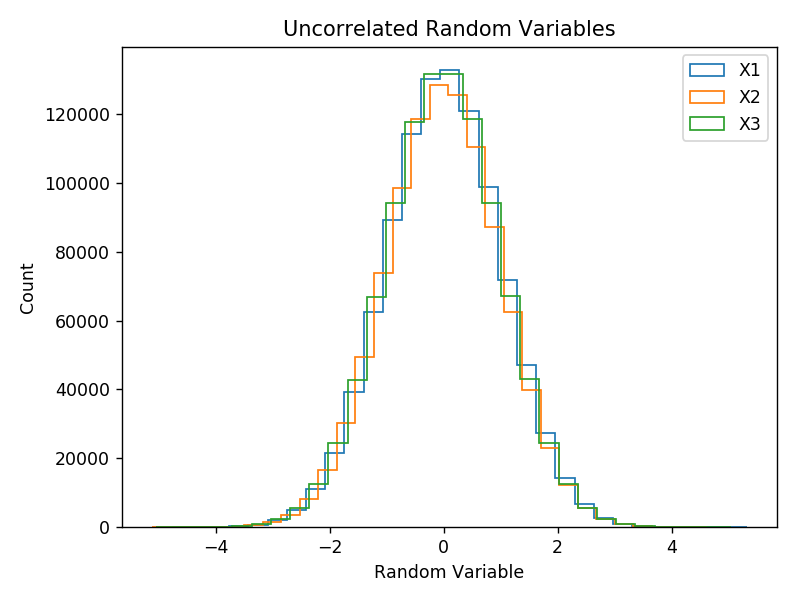

In [25]:
plt.figure(1)
plt.clf()

[plt.hist(unc_vars[i, :], bins=30, histtype='step', label=f'X{i+1}') for i in range(n_vars)]  # WHOO LIST COMPREHENSION!
plt.xlabel('Random Variable')
plt.ylabel('Count')
plt.legend()
plt.title('Uncorrelated Random Variables')

plt.tight_layout()

## Plot 2: Scatterplot of $X_3$ vs. $X_1$

A plot with 2 axes to the left and to the right of one another:  
    a. Scatterplot of the first 1000 *uncorrelated* $X_3$ vs $X_1$ with marker size equal to 2. Overlay the the theoretical line ($y=x$) in a black, dashed line.  
    b. Scatterplot of the first 1000 *correlated* $X_3$ vs $X_1$ with marker size equal to 2. Overlay the the theoretical line ($y=x$) in a black, dashed line.  

<IPython.core.display.Javascript object>


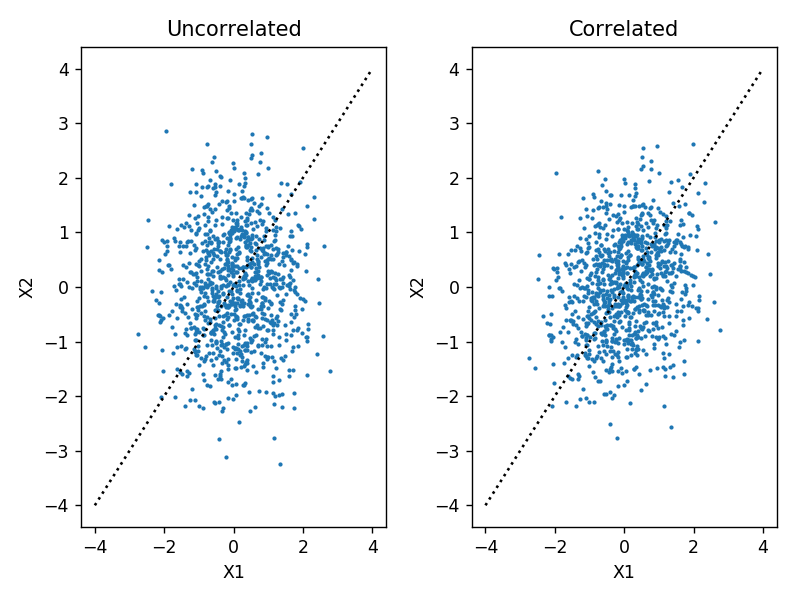

In [28]:
n_plot = int(1e3)

plt.figure(2)
plt.clf()

plt.subplot(1, 2, 1)
plt.scatter(unc_vars[0, :n_plot], unc_vars[1, :n_plot], s=2)
plt.plot([-4, 4], [-4, 4], 'k:')
plt.title('Uncorrelated')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(1, 2, 2)
plt.scatter(cor_vars[0, :n_plot], cor_vars[1, :n_plot], s=2)
plt.plot([-4, 4], [-4, 4], 'k:')
plt.title('Correlated')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()

## Plot 3: Histogram of Correlated Variables

Make a plot with overlaid histograms of your samples of uncorrelated random variables with 30 bins (use histtype='step').

<IPython.core.display.Javascript object>


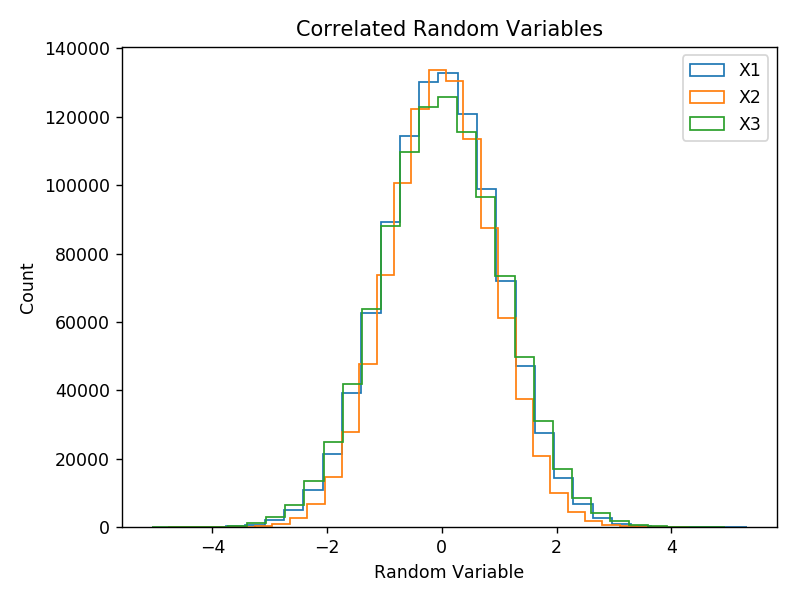

In [29]:
plt.figure(3)
plt.clf()

[plt.hist(cor_vars[i, :], bins=30, histtype='step', label=f'X{i+1}') for i in range(n_vars)]  # WHOO LIST COMPREHENSION!
plt.xlabel('Random Variable')
plt.ylabel('Count')
plt.legend()
plt.title('Correlated Random Variables')

plt.tight_layout()